In [22]:
rm(list=ls())
library("BeSS")
setwd('C:/Users/Tansu/OneDrive/Course Files/628/Module 2')
total=read.csv("clean_dataset.csv")
total = total[,-c(1,2)]
head(as.matrix(total))

BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [28]:
aic_bess = c()
bic_bess = c()
gic_bess = c()
mse_bess = c()
aic_bess[1] = Inf
bic_bess[1] = Inf
gic_bess[1] = Inf
mse_bess[1] = Inf
for ( i in 2:(length(total[1,])-1)){
  model_bic <- bess.one(x = total[,-1],y = total[,1],s = i)
  mse_bess[i] = model_bic$mse
  aic_bess[i] = model_bic$AIC
  bic_bess[i] = model_bic$BIC
  gic_bess[i] = model_bic$GIC
}
c(which(mse_bess[] == min(mse_bess)), which(aic_bess[] == min(aic_bess)),which(bic_bess[] == min(bic_bess)),which(gic_bess[] == min(gic_bess)))


[1] 15  9  3  3

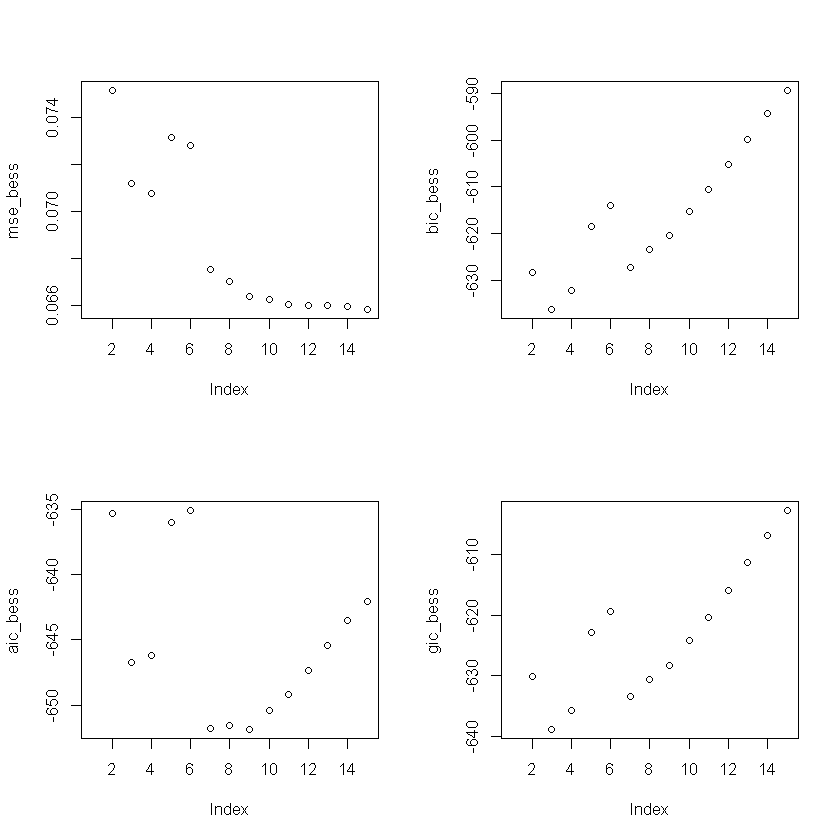

In [27]:
layout(matrix(1:4,ncol = 2))
plot(mse_bess)
plot(aic_bess)
plot(bic_bess)
plot(gic_bess)

In [42]:
model_bic <- bess.one(x = total[,-1],y = total[,1],s = 5)
summary(model_bic)

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 5 includes predictors: 

      DENSITY     ADIPOSITY         CHEST       ABDOMEN           HIP 
-4.066405e+02  4.589571e-02 -1.279628e-02  7.783275e-03 -1.274518e-02 

    log-likelihood:    323.0057 
    deviance:         -646.0114 
    AIC:              -636.0114 
    BIC:              -618.4644 
    GIC:             -622.9056 
----------------------------------------------------------------------


# Cross Validation

In [32]:
times = 1000

mse_lm_bess <- rep(0,times)
mse_lm_bess_2 <- rep(0,times)

In [48]:
for (g in 1:times){
  choices = sample(1: length(total[,1]),82*2)
  test <- total[as.vector(choices),]
  val <- total[-as.vector(choices),]

  lm_bess <- lm(data = test,BODYFAT~DENSITY+ADIPOSITY+CHEST+ABDOMEN+HIP)
  summary(lm_bess)
  pre_bess <-predict.lm(lm_bess,data = val)
  
  lm_bess_2 <- lm(data = test,DENSITY~ADIPOSITY+CHEST+KNEE)
  pre_bess_2 <-predict.lm(lm_bess_2,data = val)
  summary(lm_bess_2)
  
  for( i in 1:length(val[,1])){
    mse_lm_bess[g] = as.numeric((pre_bess[i] - val[i,1])^2) + mse_lm_bess[g]
    mse_lm_bess_2[g] = as.numeric((pre_bess_2[i] - val[i,1])^2) + mse_lm_bess_2[g]
  }
}
mse_lm_bess = mse_lm_bess/times
mse_lm_bess_2 = mse_lm_bess_2/times

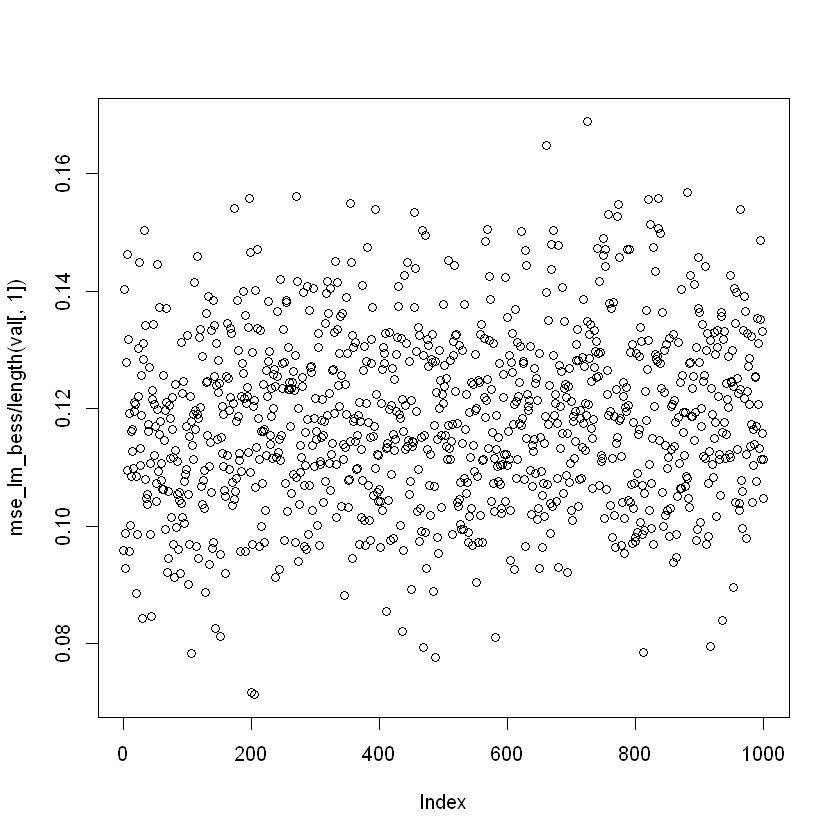

In [49]:
plot(mse_lm_bess/length(val[,1]))